# Galcian Curves
galcian curves allow for "massaging" of data
such as by cacilating reates of change until we can make it loook like a
central limit theorem
law of large numbers - everything will become galcian as it goes to infinity
theta = std
theta squared = variance
Z scores

In [1]:
# importing load_dotenv
from dotenv import load_dotenv
# importing operating system
import os
# makes file acessable
load_dotenv()
# importing requests
import requests
# importing pandas
import pandas as pd
# importing alpaca trade api
import alpaca_trade_api as trade_api
# importing datetime
from datetime import datetime
# importing plotlib
%matplotlib inline
# importing seaborn
import seaborn as sns

In [2]:
# Load .env environment variables
load_dotenv() 

True

In [3]:
# Retrieve API key and store as Python variable
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')

In [4]:
from alpaca_trade_api.rest import REST, TimeFrame
stocks = REST(alpaca_api_key,alpaca_secret_key)

In [5]:
# defining the needed tickers
tickers = ['TSLA','KO', 'MU']

In [6]:
stock_price = stocks.get_bars(tickers, TimeFrame.Day, "2020-03-01", "2022-03-01", adjustment='raw').df

In [7]:
stock_price.index=stock_price.index.date

In [8]:
stock_price.index=pd.to_datetime(stock_price.index)

In [9]:
stock_price=stock_price[['close', 'symbol']]

In [10]:
stock_price

,close,symbol
2020-03-02,55.92,KO
2020-03-03,56.06,KO
2020-03-04,58.92,KO
2020-03-05,56.74,KO
2020-03-06,55.26,KO
...,...,...
2022-02-23,764.04,TSLA
2022-02-24,800.77,TSLA
2022-02-25,809.87,TSLA
2022-02-28,870.43,TSLA


In [11]:
table = pd.pivot_table(stock_price, values='close', index=stock_price.index, columns=['symbol'])

In [12]:
table

symbol,KO,MU,TSLA
2020-03-02,55.92,54.59,743.62
2020-03-03,56.06,51.80,745.51
2020-03-04,58.92,55.29,749.50
2020-03-05,56.74,53.72,724.54
2020-03-06,55.26,51.47,703.48
...,...,...,...
2022-02-23,61.59,87.31,764.04
2022-02-24,60.51,88.83,800.77
2022-02-25,62.85,90.10,809.87
2022-02-28,62.24,88.86,870.43


In [13]:
table_daily_returns = table.pct_change()

In [14]:
table_daily_returns.dropna(inplace=True)

<AxesSubplot:ylabel='Density'>

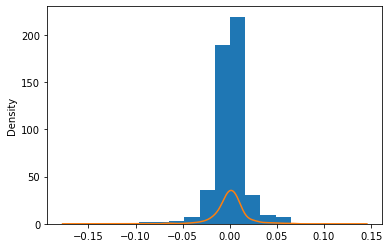

In [15]:
table_daily_returns['KO'].plot.hist()
table_daily_returns['KO'].plot.density()

/opt/anaconda3/envs/alpacaenv/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='KO', ylabel='Density'>

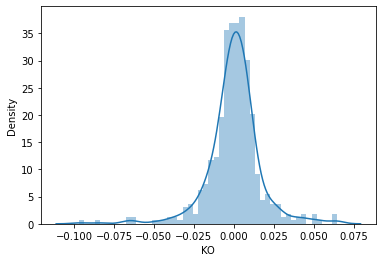

In [16]:
sns.distplot(table_daily_returns['KO'])

/opt/anaconda3/envs/alpacaenv/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TSLA', ylabel='Density'>

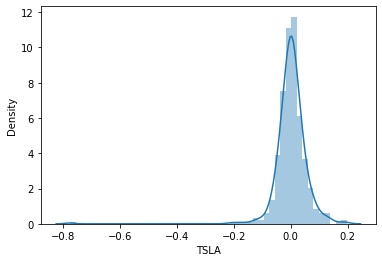

In [17]:
sns.distplot(table_daily_returns['TSLA'])

/opt/anaconda3/envs/alpacaenv/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MU', ylabel='Density'>

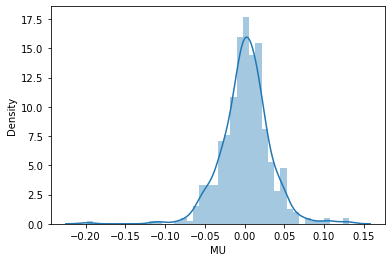

In [18]:
sns.distplot(table_daily_returns['MU'])

/opt/anaconda3/envs/alpacaenv/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/alpacaenv/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/alpacaenv/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with si

<AxesSubplot:xlabel='MU', ylabel='Density'>

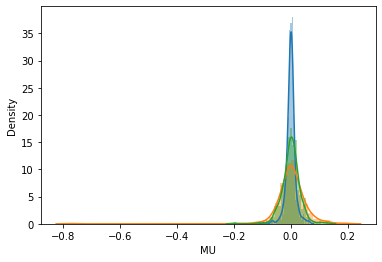

In [19]:
sns.distplot(table_daily_returns['KO'])
sns.distplot(table_daily_returns['TSLA'])
sns.distplot(table_daily_returns['MU'])

In [22]:
from  MCForecastTools import MCSimulation

In [24]:
mc_df = table_daily_returns[['TSLA', 'MU']]

In [25]:
# Configuring a Monte Carlo simulation to forecast five years cumulative returns
MC_fiveyear = MCSimulation(
    portfolio_data = mc_df,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*5
)

IndexError: Too many levels: Index has only 1 level, not 2

In [27]:
# micolumns = pd.MultiIndex.from_tuples(
#    [(tickers, "close")])

In [95]:
inital_price = table['MU'].iloc[-1]

In [96]:
inital_price

86.26

In [97]:
possible_changes = list(table_daily_returns['MU'].values)

In [98]:
possible_changes[0:10]

[-0.05110826158637127,
 0.0673745173745175,
 -0.02839573159703379,
 -0.04188384214445273,
 -0.10685836409558969,
 0.041113769849902226,
 -0.08650229837024659,
 -0.1123055809698078,
 0.10770419994846692,
 -0.19818562456385214]

In [83]:
from random import sample

In [84]:
current_pct_change = sample(possible_changes,1)[0]
current_pct_change

44.52

In [85]:
current_price = inital_price * (1+ current_pct_change)
current_price

3926.5552000000007

In [86]:
num_days = 252

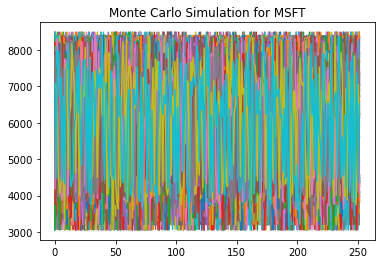

In [87]:
import matplotlib.pyplot as plt
realizations = []
for i in range(0,500):
    current_price = inital_price
    current_price_history = []
    for i in range(num_days):
        current_pct_change = sample(possible_changes,1)[0]
        current_price = inital_price * (1+ current_pct_change)
        current_price_history.append(current_price)
    plt.plot(current_price_history)
    plt.title("Monte Carlo Simulation for MSFT")
    
    realizations.append(current_price_history)
